https://github.com/IgnacioPardo/Tecnologias_Exponenciales_2023/blob/main/Consigna_TP_Final.md

In [3]:
%pip install tensorflow
%pip install numpy
%pip install matplotlib
%pip install keras-visualizer


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
     ---------------------------------------- 0.0/47.0 kB ? eta -:--:--
     ---------------- --------------------- 20.5/47.0 kB 640.0 kB/s eta 0:00:01
     -------------------------------------- 47.0/47.0 kB 782.9 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [24]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from keras_visualizer import visualizer
import os
import random

El problema a resolver es detectar en una foto de una mano, si se está haciendo piedra, papel, o tijera. Para esto, se utilizará una red neuronal convolucional, que es un tipo de red neuronal que se utiliza para procesar datos que tienen una topología de cuadrícula, como una imagen. Una CNN es capaz de extraer features de una imagen y usarlas para identificar objetos en ella.

In [5]:
# Transformamos las imagenes a tensores
train = ImageDataGenerator(rescale=1.0 / 255)
tensor_train = train.flow_from_directory(
    "train", target_size=(224, 224), batch_size=32, class_mode="categorical"
)

Found 2020 images belonging to 3 classes.


In [6]:
test = ImageDataGenerator(rescale=1.0 / 255)
tensor_test = test.flow_from_directory(
    "test", target_size=(224, 224), batch_size=32, class_mode="categorical"
)

Found 120 images belonging to 3 classes.


In [7]:
validation = ImageDataGenerator(rescale=1.0 / 255)
tensor_validation = validation.flow_from_directory(
    "validation", target_size=(224, 224), batch_size=32, class_mode="categorical"
)

Found 48 images belonging to 3 classes.


In [19]:
# Hacemos el modelo
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Conv2D(
            64, (3, 3), activation="relu", input_shape=(224, 224, 3)
        ),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(3, activation="softmax"),
    ]
)

# Optimizamos el modelo como recomienda copilot chat
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

Visualización de las capas del modelo:

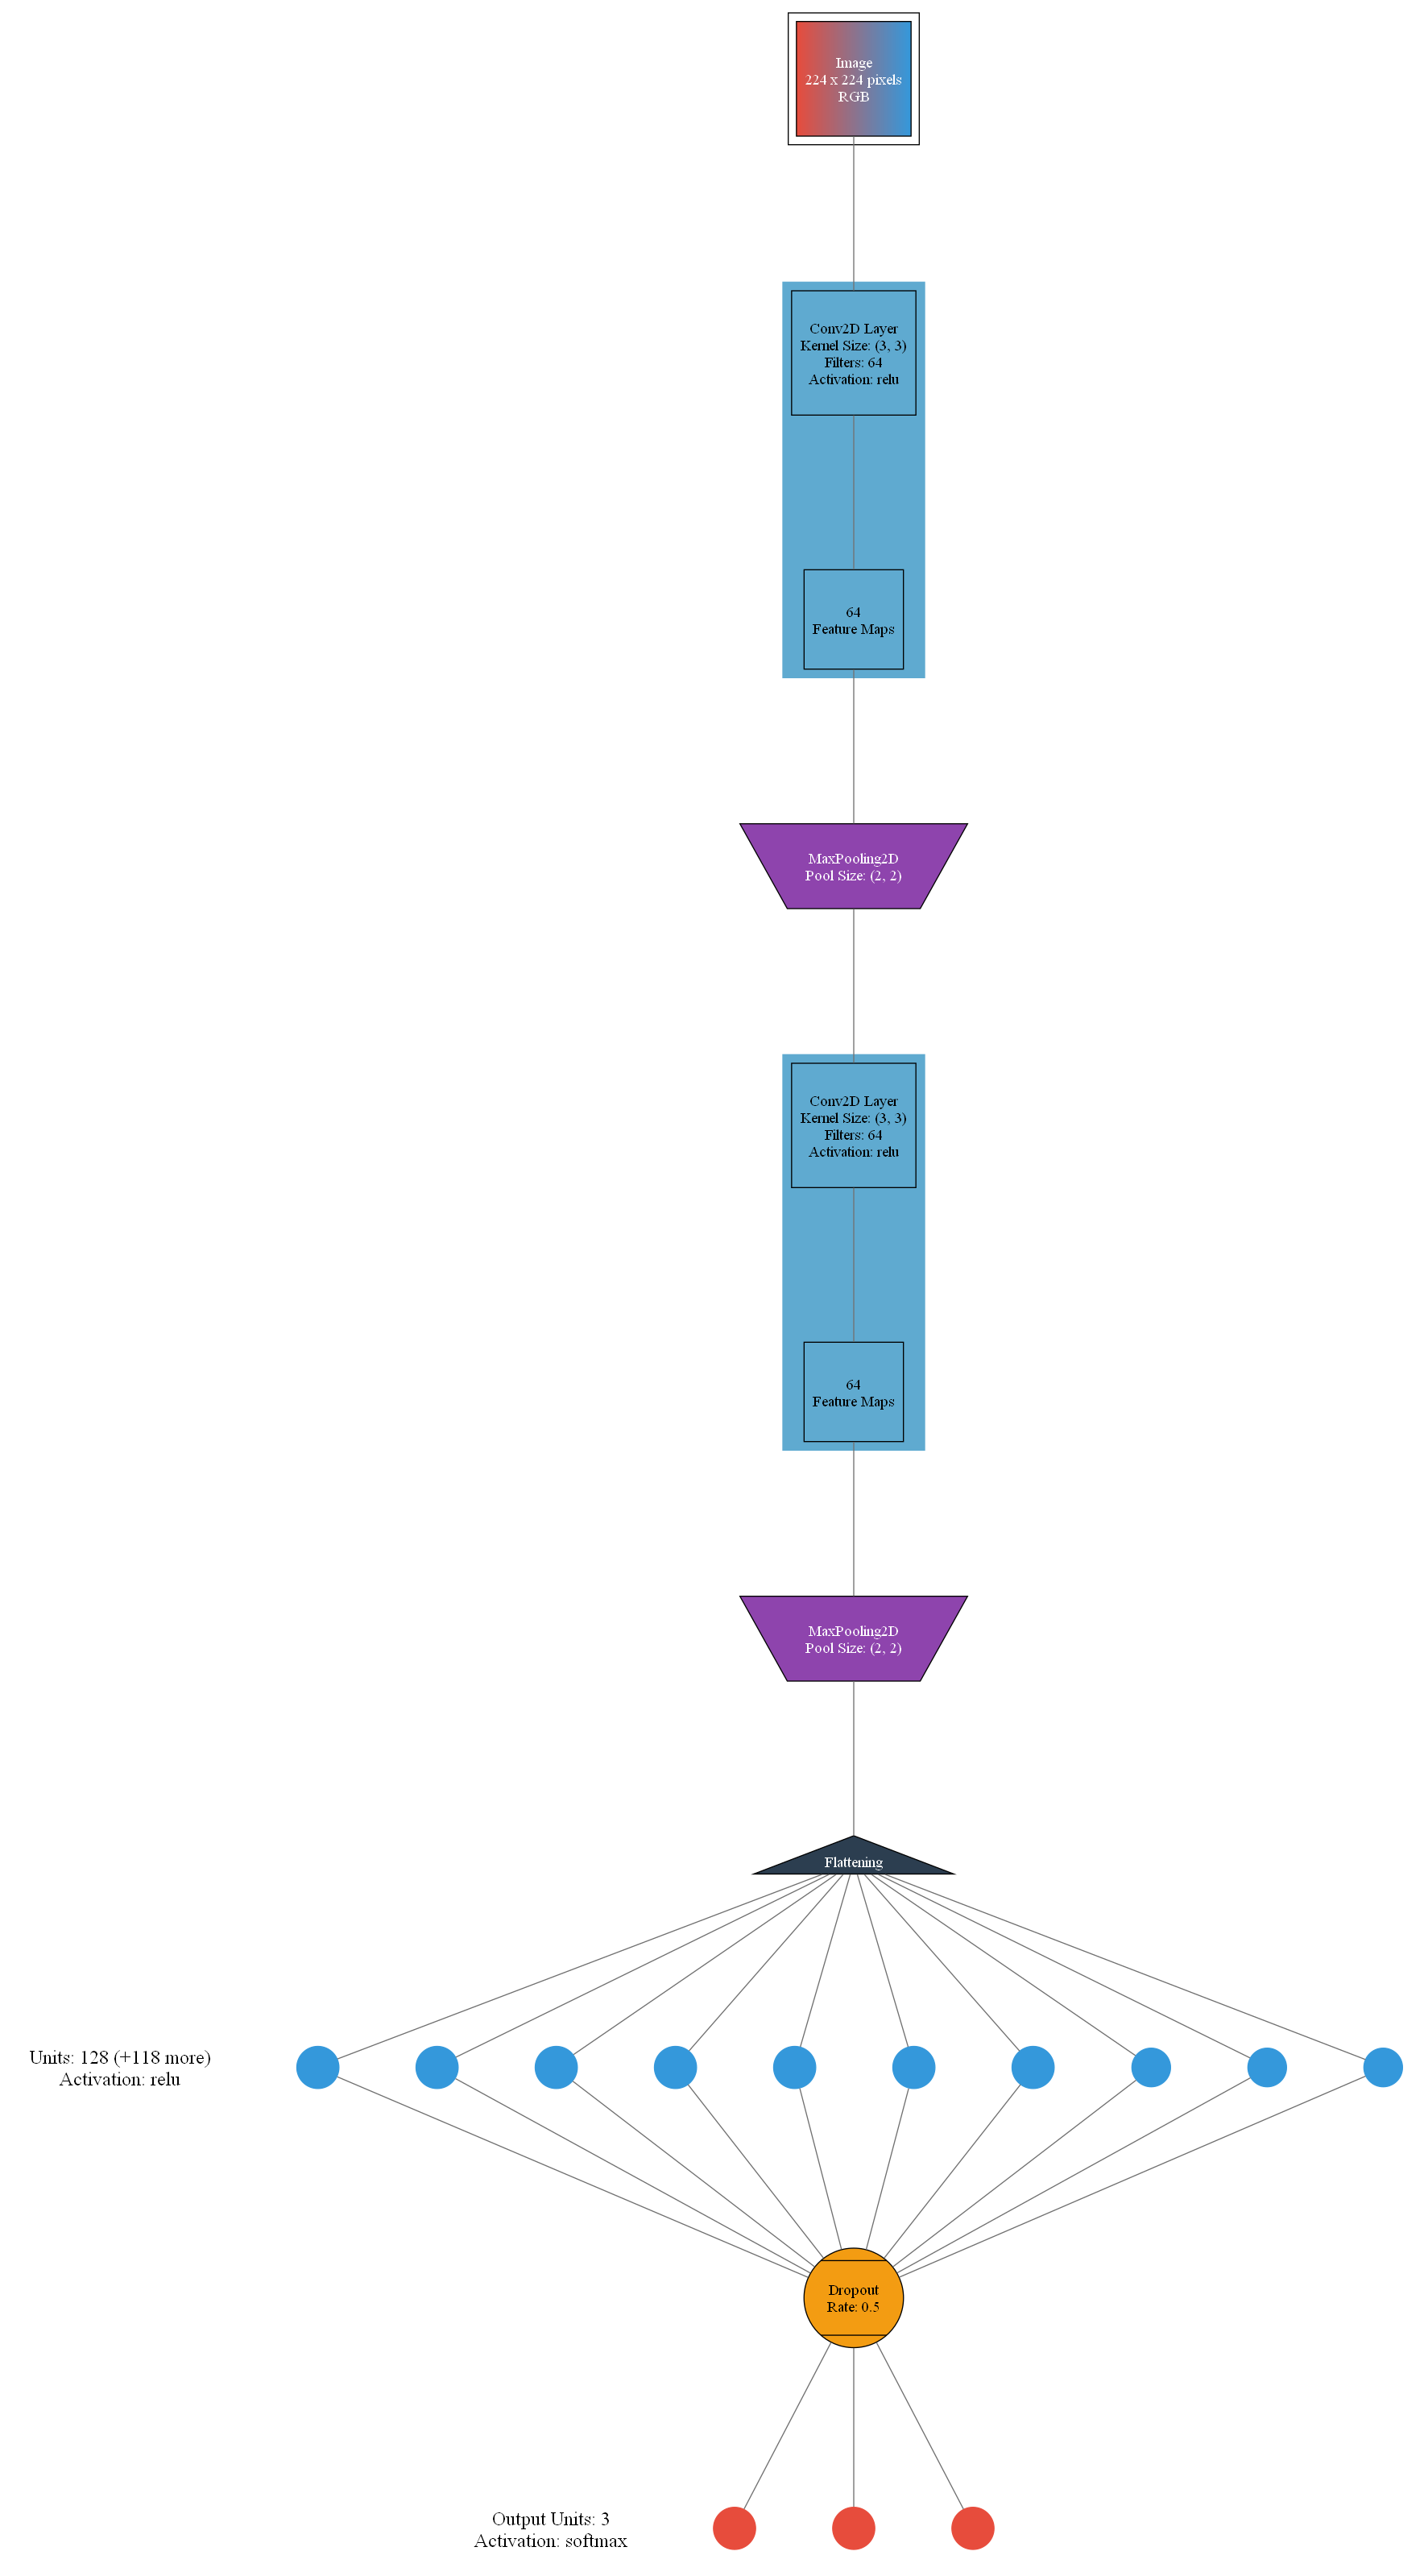

In [22]:
from IPython.display import Image

os.environ["PATH"] += os.pathsep + 'A:/Downloads/Graphviz/bin'
visualizer(model, file_format='png')
Image(filename="./graph.png")

Para poder entender que está pasando en el gráfico, vamos a explicar algunos conceptos vistos en clase.

Una convolución es un concepto matemático que se utiliza ampliamente en el procesamiento de señales e imágenes. En el contexto de las redes neuronales convolucionales, una convolución es una operación matemática que toma dos entradas: una imagen de entrada y un filtro llamado kernel. La convolución de la imagen de entrada con el kernel produce una imagen de salida, llamado feature map.  
  
El kernel es una matriz cuadrada de números que se utiliza para extraer distinas features específicas de la imagen de entrada. Va pasando de fomra iterativa por cada grupo de NxN pixeles, y muliplicandolos por los valores de esta matriz. El resultado de esta multiplicación se suma y se guarda en la posición correspondiente del feature map. 
   
Luego tenemos el pooling, que es una operación que se utiliza para reducir el tamaño de la imagen, y por lo tanto, la cantidad de parámetros de la red. Esto se hace para evitar el overfitting. El pooling se realiza sobre cada feature map, y consiste en tomar una ventana de NxN pixeles, y quedarse con un valor de esa ventana, puede ser el promedio, el mínimo, o, como en este caso, el maximo. Luego cada valor se mete en una nueva matriz, que es la utilizada para la siguiente capa.

Por último, el flattening es simplemente transformar la matriz de pixeles de dos dimensiones en un vector de una dimensión, para poder utilizarlo como entrada de una red neuronal densa. Se pasa por una última capa de activación, un dropout, y por último la capa de salida, que tiene 3 neuronas, una para cada clase: piedra, papel, o tijera. La que mayor valor tenga será la elegida.

In [23]:
# Fiteamos el modelo
fitted_model = model.fit(
    tensor_train,
    steps_per_epoch=50,
    epochs=5,
    validation_data=tensor_validation,
    validation_steps=20,
)

Epoch 1/5


50/50 [==============================] - 32s 624ms/step - loss: 1.3464 - accuracy: 0.5700 - val_loss: 0.3922 - val_accuracy: 0.9375
Epoch 2/5
50/50 [==============================] - 31s 628ms/step - loss: 0.5077 - accuracy: 0.8193
Epoch 3/5
50/50 [==============================] - 31s 622ms/step - loss: 0.3265 - accuracy: 0.8842
Epoch 4/5
50/50 [==============================] - 30s 594ms/step - loss: 0.2622 - accuracy: 0.9052
Epoch 5/5
50/50 [==============================] - 31s 617ms/step - loss: 0.1973 - accuracy: 0.9307


In [25]:
# Evaluamos el modelo
loss, accuracy = model.evaluate(tensor_test)
display(loss, accuracy)

4/4 [==============================] - 1s 116ms/step - loss: 0.1532 - accuracy: 0.9500


0.15315134823322296

0.949999988079071

Prueba con fotos:

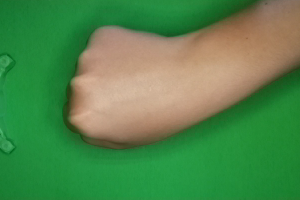

1/1 [==============================] - 0s 24ms/step
Rock 96.96868658065796%


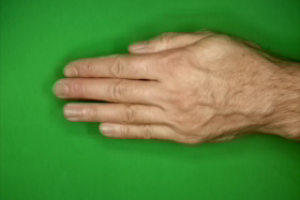

1/1 [==============================] - 0s 23ms/step
Paper 100.0%


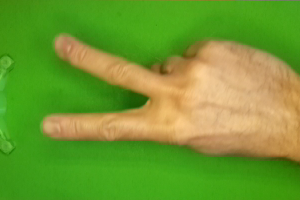

1/1 [==============================] - 0s 22ms/step
Scissors 100.0%


In [105]:
def show_result(result):
    index = np.argmax(result)
    if index == 0:
        print(f"Paper {result[0][index] * 100}%")
    elif index == 1:
        print(f"Rock {result[0][index] * 100}%")
    elif index == 2:
        print(f"Scissors {result[0][index] * 100}%")
    else:
        print("Unknown")

rocks = [file for file in os.listdir("./test/rock/")]
paper = [file for file in os.listdir("./test/paper/")]
scissors = [file for file in os.listdir("./test/scissors/")]

random_rock = random.choice(rocks)
random_paper = random.choice(paper)
random_scissors = random.choice(scissors)

image_rock = Image.open(f"./test/rock/{random_rock}")
image_paper = Image.open(f"./test/paper/{random_paper}")
image_scissors = Image.open(f"./test/scissors/{random_scissors}")

display(image_rock)
show_result(model.predict(np.array(image_rock.resize((224, 224))).reshape(1, 224, 224, 3)))

display(image_paper)
show_result(model.predict(np.array(image_paper.resize((224, 224))).reshape(1, 224, 224, 3)))

display(image_scissors)
show_result(model.predict(np.array(image_scissors.resize((224, 224))).reshape(1, 224, 224, 3)))
